In [9]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
print(os.getcwd())
with open('../../../target/RecMeasure.json') as f:
    data = json.load(f)
    data2 = []
    base = data[-1][0]
    for i,(t,m) in enumerate(data):
        if i < len(data) - 1:
            data2.append([(data[i][0]- base)/1000, data[i][0] - data[i+1][0],(data[i][1] - data[i+1][1])/1000/(data[i][0] - data[i+1][0])])
        else:
            pass
    df = pd.DataFrame(data2, columns=["time","duration","mps"])

/Users/terenceng/Documents/KTH/2024 Digital Future/Windowed-CRDT/src/main/python


In [11]:
df

,time,duration,mps
0,79.830,300,1.444827
1,79.530,300,1.508693
2,79.230,300,1.451867
3,78.930,300,1.443940
4,78.630,301,1.434183
...,...,...,...
261,1.501,300,1.512573
262,1.201,300,1.405727
263,0.901,300,1.455313
264,0.601,300,0.528150


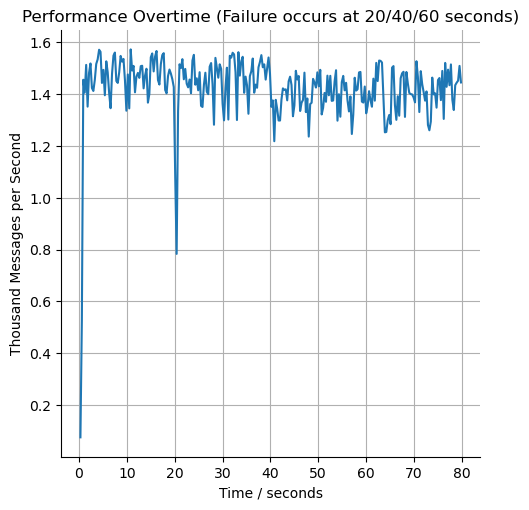

In [13]:
sns.relplot(data=df, x="time",y ="mps",kind="line")
plt.grid()
plt.xlabel('Time / seconds')
plt.ylabel('Thousand Messages per Second')
plt.title('Performance Overtime (Failure occurs at 20/40/60 seconds)')
plt.savefig('../../../target/RecFig.png')
